# preprocesamiento *user_default*



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from google.colab import files

In [ ]:
df = pd.read_csv('default.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   user_id       36000 non-null  int64
 1   default_flag  36000 non-null  int64
dtypes: int64(2)
memory usage: 562.6 KB


In [ ]:
df.nunique()

user_id         36000
default_flag        2
dtype: int64

In [ ]:
df.isnull().sum()

user_id         0
default_flag    0
dtype: int64

# EDA *user_default*


In [ ]:
df.describe()

,user_id,default_flag
count,36000.000000,36000.000000
mean,18000.500000,0.018972
std,10392.449182,0.136429
min,1.000000,0.000000
25%,9000.750000,0.000000
50%,18000.500000,0.000000
75%,27000.250000,0.000000
max,36000.000000,1.000000


# preprocesamiento *user_info*



In [ ]:
df = pd.read_csv('user_info.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            36000 non-null  int64  
 1   age                36000 non-null  int64  
 2   sex                36000 non-null  object 
 3   last_month_salary  28801 non-null  float64
 4   number_dependents  35057 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.4+ MB


In [ ]:
df.nunique()

,0
user_id,36000
age,81
sex,2
last_month_salary,7389
number_dependents,12


In [ ]:
df.isnull().sum()

,0
user_id,0
age,0
sex,0
last_month_salary,7199
number_dependents,943


In [ ]:
df['last_month_salary'] = df['last_month_salary'].replace([np.nan, np.inf, -np.inf], 0)

# Convertir la columna 'last_month_salary' de float a int
df['last_month_salary'] = df['last_month_salary'].astype(int)

# Verificar los cambios
print(df)
print(df.dtypes)  # Verificar los tipos de datos de las columnas

       user_id  age sex  last_month_salary  number_dependents
0            1   55   F               2200                0.0
1            2   44   M               7499                0.0
2            3   54   M               5900                0.0
3            4   54   F               2167                0.0
4            5   42   M              10415                2.0
...        ...  ...  ..                ...                ...
35995    35996   68   F              10833                0.0
35996    35997   84   M               8456                0.0
35997    35998   70   F               6000                0.0
35998    35999   64   F               5045                0.0
35999    36000   28   M               3500                0.0

[36000 rows x 5 columns]
user_id                int64
age                    int64
sex                   object
last_month_salary      int64
number_dependents    float64
dtype: object


In [ ]:
df['number_dependents'] = df['number_dependents'].replace([np.nan, np.inf, -np.inf], 0)

# Convertir la columna 'last_month_salary' de float a int
df['number_dependents'] = df['number_dependents'].astype(int)

# Verificar los cambios
print(df)
print(df.dtypes)  # Verificar los tipos de datos de las columnas

       user_id  age sex  last_month_salary  number_dependents
0            1   55   F               2200                  0
1            2   44   M               7499                  0
2            3   54   M               5900                  0
3            4   54   F               2167                  0
4            5   42   M              10415                  2
...        ...  ...  ..                ...                ...
35995    35996   68   F              10833                  0
35996    35997   84   M               8456                  0
35997    35998   70   F               6000                  0
35998    35999   64   F               5045                  0
35999    36000   28   M               3500                  0

[36000 rows x 5 columns]
user_id               int64
age                   int64
sex                  object
last_month_salary     int64
number_dependents     int64
dtype: object


In [ ]:
df.to_csv('user_info_cleaned.csv', index=False)

# Descargar el archivo CSV en Google Colab (si estás usando Google Colab)
from google.colab import files
files.download('user_info_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# EDA *user_info_cleaned*

In [ ]:
df = pd.read_csv('user_info_cleaned.csv')

In [ ]:
df.describe()

,user_id,age,last_month_salary,number_dependents
count,36000.000000,36000.000000,3.600000e+04,36000.000000
mean,18000.500000,52.417417,5.340227e+03,0.738222
std,10392.449182,14.791331,1.189699e+04,1.110608
min,1.000000,21.000000,0.000000e+00,0.000000
25%,9000.750000,41.000000,1.500000e+03,0.000000
50%,18000.500000,52.000000,4.370000e+03,0.000000
75%,27000.250000,63.000000,7.416000e+03,1.000000
max,36000.000000,109.000000,1.560100e+06,13.000000


In [ ]:
print(df)

       user_id  age sex  last_month_salary  number_dependents
0            1   55   F               2200                  0
1            2   44   M               7499                  0
2            3   54   M               5900                  0
3            4   54   F               2167                  0
4            5   42   M              10415                  2
...        ...  ...  ..                ...                ...
35995    35996   68   F              10833                  0
35996    35997   84   M               8456                  0
35997    35998   70   F               6000                  0
35998    35999   64   F               5045                  0
35999    36000   28   M               3500                  0

[36000 rows x 5 columns]


In [ ]:

fig = px.box(df, y="age", points="all")
fig.show()

In [ ]:

fig = px.box(df, y="number_dependents", points="all")
fig.show()


In [ ]:

fig = px.box(df, y="last_month_salary", points="all")
fig.show()
#este boxplot volver a verlo una vez unidas las tablas y diferenciado en 0 y 1

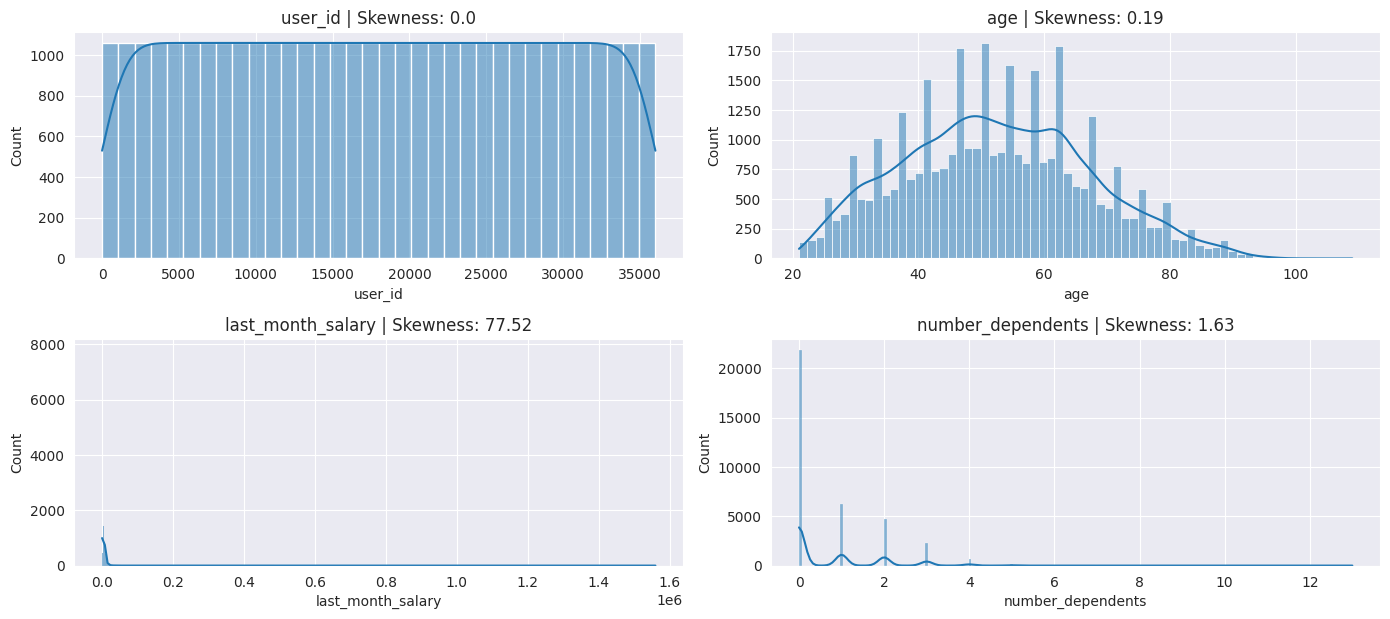

In [ ]:
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

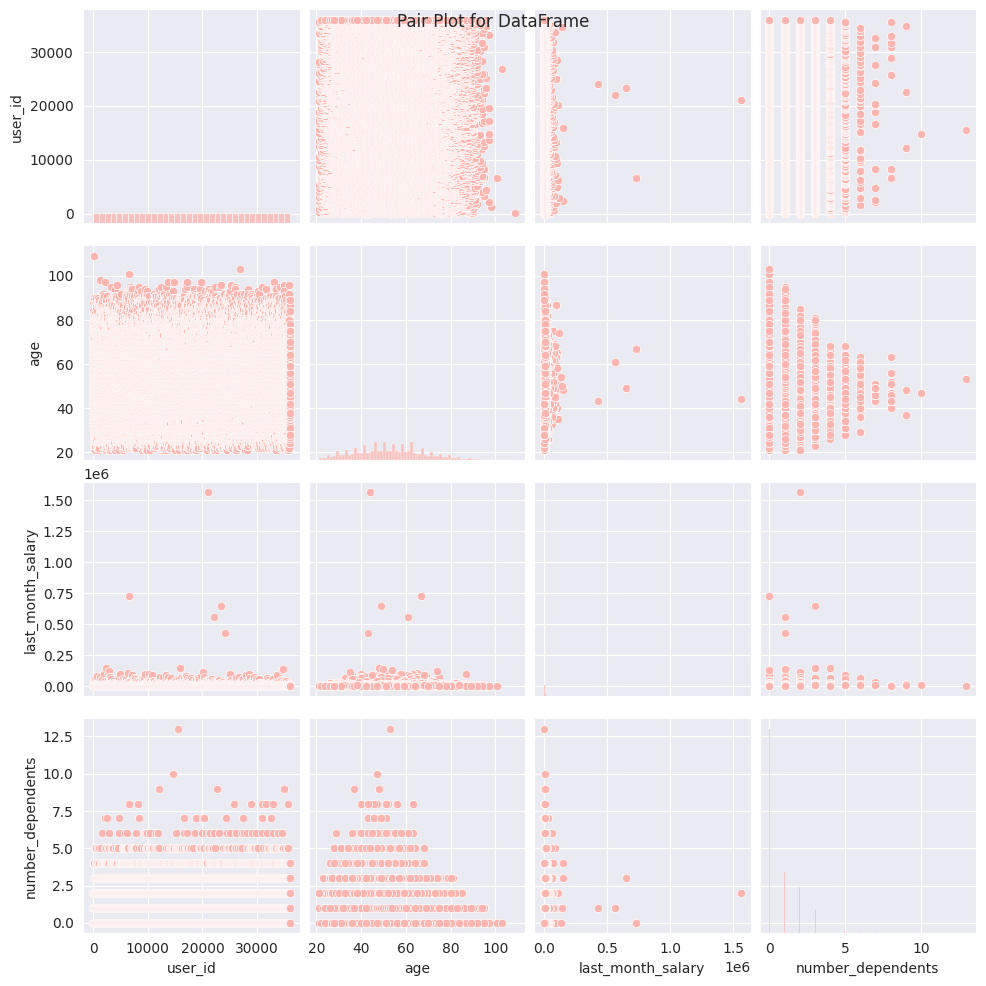

In [ ]:
# Set the color palette
sns.set_palette("Pastel1")

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))

# Using Seaborn to create a pair plot with the specified color palette
sns.pairplot(df)

plt.suptitle('Pair Plot for DataFrame')
plt.show()

# preprocesamiento *loans_detail*


In [ ]:
df = pd.read_csv('loans_detail.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 6 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   user_id                                       36000 non-null  int64  
 1   more_90_days_overdue                          36000 non-null  int64  
 2   using_lines_not_secured_personal_assets       36000 non-null  float64
 3   number_times_delayed_payment_loan_30_59_days  36000 non-null  int64  
 4   debt_ratio                                    36000 non-null  float64
 5   number_times_delayed_payment_loan_60_89_days  36000 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1.6 MB


In [ ]:
df.describe()

,user_id,more_90_days_overdue,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,debt_ratio,number_times_delayed_payment_loan_60_89_days
count,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000
mean,18000.500000,0.260806,5.807040,0.419278,351.580075,0.237861
std,10392.449182,4.121365,223.407144,4.144020,2011.635341,4.105515
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9000.750000,0.000000,0.029526,0.000000,0.176265,0.000000
50%,18000.500000,0.000000,0.149655,0.000000,0.366169,0.000000
75%,27000.250000,0.000000,0.548529,0.000000,0.873552,0.000000
max,36000.000000,98.000000,22000.000000,98.000000,307001.000000,98.000000


In [ ]:
df.isnull().sum()

user_id                                         0
more_90_days_overdue                            0
using_lines_not_secured_personal_assets         0
number_times_delayed_payment_loan_30_59_days    0
debt_ratio                                      0
number_times_delayed_payment_loan_60_89_days    0
dtype: int64

In [ ]:
df.nunique()

user_id                                         36000
more_90_days_overdue                               18
using_lines_not_secured_personal_assets         30824
number_times_delayed_payment_loan_30_59_days       14
debt_ratio                                      30643
number_times_delayed_payment_loan_60_89_days       10
dtype: int64

# EDA *loans_detail*

In [ ]:
import plotly.express as px
fig = px.histogram(df, y="more_90_days_overdue")
fig.show()

In [ ]:

fig = px.histogram(df, y="number_times_delayed_payment_loan_30_59_days")
fig.show()

In [ ]:

fig = px.histogram(df, y="number_times_delayed_payment_loan_60_89_days")
fig.show()

In [ ]:

fig = px.box(df, y="more_90_days_overdue", points="all")
fig.show()

In [ ]:

fig = px.box(df, y="number_times_delayed_payment_loan_30_59_days", points="all")
fig.show()

In [ ]:

fig = px.box(df, y="number_times_delayed_payment_loan_60_89_days", points="all")
fig.show()

# preprocesamiento *loans_outstanding*

In [ ]:
df = pd.read_csv('loans_outstanding.csv')

In [ ]:
df.describe()

,loan_id,user_id
count,305335.000000,305335.000000
mean,152668.000000,18023.509607
std,88142.766559,10347.616388
min,1.000000,1.000000
25%,76334.500000,9051.000000
50%,152668.000000,18046.000000
75%,229001.500000,27002.500000
max,305335.000000,35999.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305335 entries, 0 to 305334
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   loan_id    305335 non-null  int64 
 1   user_id    305335 non-null  int64 
 2   loan_type  305335 non-null  object
dtypes: int64(2), object(1)
memory usage: 7.0+ MB


In [ ]:
type('loan_type') is str

True

In [ ]:
type('loan_type') is int

False

In [ ]:
def loan_type_check(loan_type):
    loan_type = loan_type.lower()
    if loan_type == 'others':
        return 'other'
    else:
        return loan_type


df['loan_type'] = df['loan_type'].apply(loan_type_check)
print(df['loan_type'])


0         real estate
1         real estate
2         real estate
3         real estate
4         real estate
             ...     
305330          other
305331          other
305332          other
305333          other
305334          other
Name: loan_type, Length: 305335, dtype: object


In [ ]:
df['loan_type_check'] = df['loan_type'].apply(loan_type_check)


df = df[['user_id', 'loan_id', 'loan_type_check']]


df.to_csv('loan_type_cleaned.csv', index=False)
print(df)



        user_id  loan_id loan_type_check
0             2        1     real estate
1             3        2     real estate
2             5        3     real estate
3             5        4     real estate
4             8        5     real estate
...         ...      ...             ...
305330    35999   305331           other
305331    35999   305332           other
305332    35999   305333           other
305333    35999   305334           other
305334    35999   305335           other

[305335 rows x 3 columns]


In [ ]:
# Descargar el archivo CSV en Google Colab
from google.colab import files
files.download('loan_type_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# EDA *loan_type_cleaned* (previamente *loans_outstanding*)

In [ ]:
df = pd.read_csv('loan_type_cleaned.csv')

In [ ]:
df.describe()

,user_id,loan_id
count,305335.000000,305335.000000
mean,18023.509607,152668.000000
std,10347.616388,88142.766559
min,1.000000,1.000000
25%,9051.000000,76334.500000
50%,18046.000000,152668.000000
75%,27002.500000,229001.500000
max,35999.000000,305335.000000


# EDA *user_1*

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from google.colab import auth
from google.cloud import bigquery

In [ ]:
# Autenticar en Google Colab
auth.authenticate_user()

project_id = 'saltoproyecto3'  # Reemplaza con tu ID de proyecto
client = bigquery.Client(project=project_id)

# Definir la consulta a la vista en BigQuery
query = """
SELECT *
FROM `saltoproyecto3.riesgorelativo.user_1`
"""

# Ejecutar la consulta
query_job = client.query(query)

# Convertir los resultados a un DataFrame de Pandas
df = query_job.to_dataframe()

# Mostrar los primeros registros del DataFrame
df.head()

,user_id,number_dependents,age,last_month_salary,category,generation,default_flag,more_90_days_overdue,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,debt_ratio,number_times_delayed_payment_loan_60_89_days,loan_count,real_estate,others
0,174,1,51,24020,bad_payer,q2,1,1,0.859196,2,0.142792,4,13,0,13
1,269,1,38,8000,bad_payer,q1,1,1,1.092301,4,0.882390,0,14,0,14
2,307,1,31,4150,bad_payer,q1,1,2,1.000000,1,0.678391,3,3,0,3
3,331,0,27,1280,bad_payer,q1,1,2,1.000000,0,0.470726,1,3,0,3
4,464,2,44,1959,bad_payer,q2,1,2,1.000000,2,0.545918,1,4,0,4


In [ ]:
import plotly.express as px
fig = px.box(df, y="age", points="all")
fig.show()

In [ ]:
import plotly.express as px
fig = px.box(df, y="last_month_salary", points="all")
fig.show()

In [ ]:
import plotly.express as px
fig = px.box(df, y="debt_ratio", points="all")
fig.show()

In [ ]:
import plotly.express as px
fig = px.box(df, y="more_90_days_overdue", points="all")
fig.show()

In [ ]:
import plotly.express as px
fig = px.box(df, y="loan_count", points="all")
fig.show()

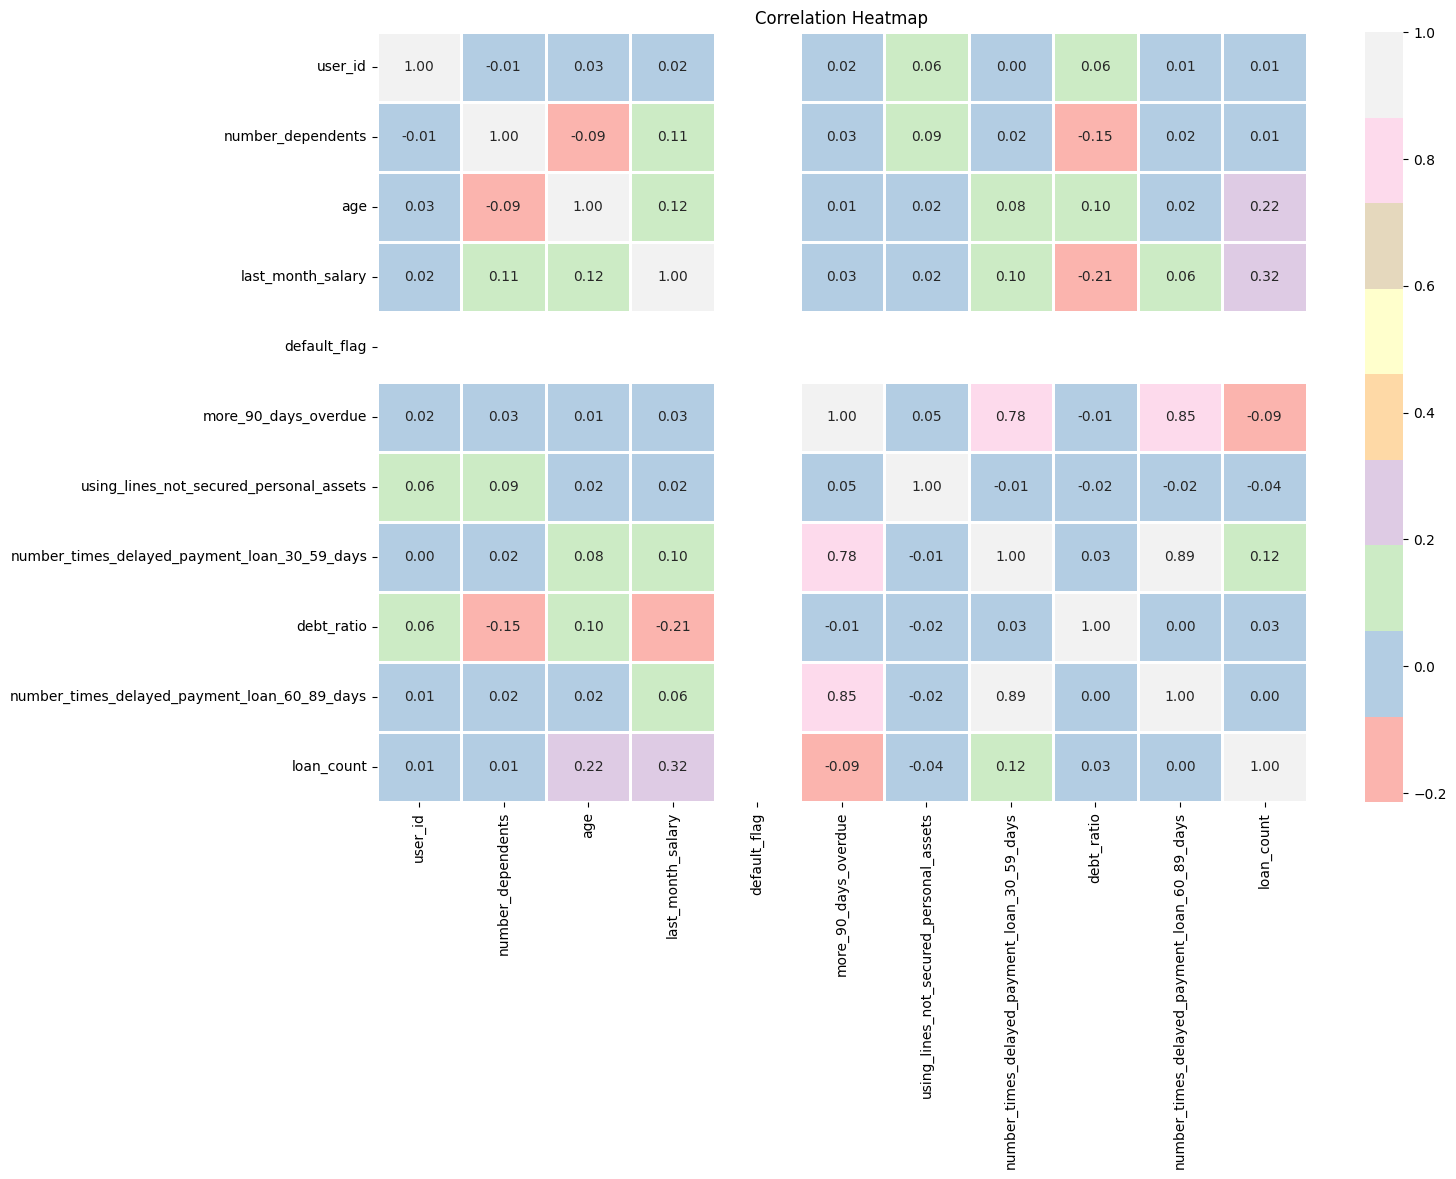

In [ ]:
plt.figure(figsize=(15, 10))

# Eliminar la columna 'category' antes de calcular la correlación
corr_matrix = df.drop(columns=['category', 'generation', 'real_estate', 'others']).corr()

# Usar Seaborn para crear un heatmap con la matriz de correlación
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='Pastel1', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()


# EDA user_0

In [ ]:
# Autenticar en Google Colab
auth.authenticate_user()

project_id = 'saltoproyecto3'  # Reemplaza con tu ID de proyecto
client = bigquery.Client(project=project_id)

# Definir la consulta a la vista en BigQuery
query = """
SELECT *
FROM `saltoproyecto3.riesgorelativo.user_0`
"""

# Ejecutar la consulta
query_job = client.query(query)

# Convertir los resultados a un DataFrame de Pandas
df = query_job.to_dataframe()

# Mostrar los primeros registros del DataFrame
df.head()

,user_id,number_dependents,age,last_month_salary,category,generation,default_flag,more_90_days_overdue,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,debt_ratio,number_times_delayed_payment_loan_60_89_days,loan_count,real_estate,others
0,1,0,55,2200,good_payer,q3,0,0,0.667083,0,0.153112,0,3,0,3
1,2,0,44,7499,good_payer,q2,0,0,0.007093,0,0.148800,0,20,0,20
2,3,0,54,5900,good_payer,q3,0,0,0.091213,0,0.351635,1,15,0,15
3,4,0,54,2167,good_payer,q3,0,0,0.112680,0,0.065959,0,3,0,3
4,5,2,42,10415,good_payer,q2,0,0,0.323985,0,0.352151,0,8,0,8


In [ ]:
import plotly.express as px
fig = px.box(df, y="age", points="all")
fig.show()

In [ ]:
import plotly.express as px
fig = px.box(df, y="last_month_salary", points="all")
fig.show()

In [ ]:
import plotly.express as px
fig = px.box(df, y="more_90_days_overdue", points="all")
fig.show()

In [ ]:
# 3.1 - Crear el histograma interactivo
fig = px.histogram(df, x='more_90_days_overdue', nbins=100, title='Histograma de último salrio f0')
# Mostrar el histograma
fig.show()

In [ ]:
import plotly.express as px
fig = px.box(df, y="loan_count", points="all")
fig.show()

In [ ]:
import plotly.express as px
fig = px.box(df, y="debt_ratio", points="all")
fig.show()